# Flight Price Prediction System

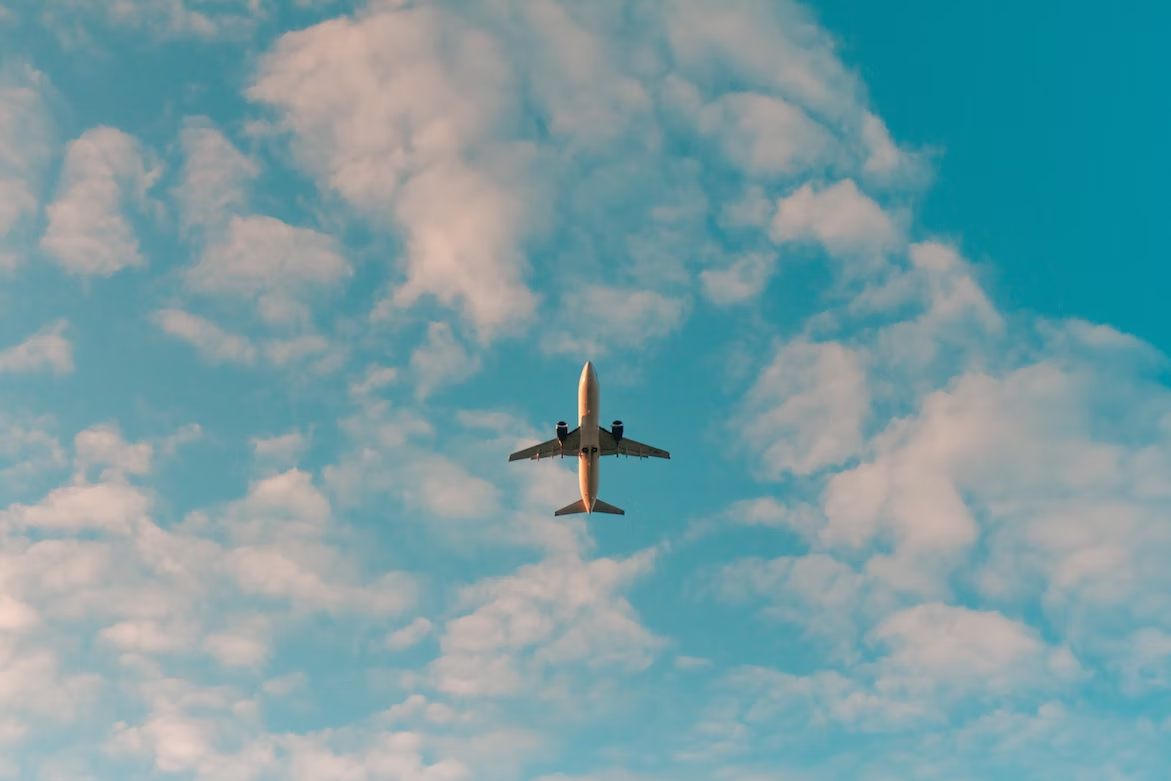



---



# Data Preprocessing

## Importing necessary libraries

In [1]:
import pandas as pd                 # Analyse Big Data
import seaborn as sns               # Statistical Graphs
import numpy as np                  # Mathematical Operations on Arrays
import matplotlib.pyplot as plt     # Create 2D Plots and plots
import datetime as dt               # Working with dates and times
import mlflow
import mlflow.sklearn
from mlflow.models import infer_signature

## Reading the training data

In [2]:
flight_train = pd.read_csv('Flight_Price.csv')
flight_train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR ? DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,21:35,4h 45m,1 stop,No info,13302


## Checking shape of our data

In [3]:
flight_train.shape

(10683, 11)

## Checking null values in the dataset

In [4]:
flight_train.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

## Checking the datatypes of our columns in the dataset

In [5]:
flight_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10683 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10683 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [6]:
flight_train.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


# Data Preparation

## Merging Delhi and New Delhi


After looking at the profile report we saw that the `Destination` column has `Delhi` and `New Delhi` as different cities though they are same.

In [7]:
def newdelhi(x):
    if x=='New Delhi':
        return 'Delhi'
    else:
        return x
flight_train['Destination'] = flight_train['Destination'].apply(newdelhi)

## Making day and month columns from the `Date_of_Journey` column as datetime datatypes

Extracting day and month from the `Date_of_Journey` column and dropping the `Date_of_Journey` column

In [8]:
flight_train['Journey_Day'] = pd.to_datetime(flight_train['Date_of_Journey'],format='%d/%m/%Y').dt.day      # Extracting Journey Day
flight_train['Journey_Month'] = pd.to_datetime(flight_train['Date_of_Journey'],format='%d/%m/%Y').dt.month      # Extracting Journey Month

flight_train.drop('Date_of_Journey',inplace=True,axis=1)        # Dropping Column
flight_train.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month
0,IndiGo,Banglore,Delhi,BLR ? DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6
3,IndiGo,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,Banglore,Delhi,BLR ? NAG ? DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3


## Extracting Hours and Minutes from Time

- We will extract Departure Hour and Departure Minutes from `Dep_Time`.
- And same will be done for `Arrival_Time`.
- And after that, we will drop both columns.

In [9]:
flight_train['Dep_Hour'] = pd.to_datetime(flight_train['Dep_Time']).dt.hour   # Extracting Hour
flight_train['Dep_Min'] = pd.to_datetime(flight_train['Dep_Time']).dt.minute    # Extracting Minutes
flight_train.drop('Dep_Time',axis=1,inplace=True)       # Dropping Column

flight_train['Arrival_Hour'] = pd.to_datetime(flight_train['Arrival_Time']).dt.hour     # Extracting Hour
flight_train['Arrival_Min'] = pd.to_datetime(flight_train['Arrival_Time']).dt.minute    # Extracting Minutes
flight_train.drop('Arrival_Time',axis=1,inplace=True)       # Dropping Column

flight_train.head()

C:\Users\peer1\AppData\Local\Temp\ipykernel_26868\659505100.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  flight_train['Dep_Hour'] = pd.to_datetime(flight_train['Dep_Time']).dt.hour   # Extracting Hour
C:\Users\peer1\AppData\Local\Temp\ipykernel_26868\659505100.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  flight_train['Dep_Min'] = pd.to_datetime(flight_train['Dep_Time']).dt.minute    # Extracting Minutes
C:\Users\peer1\AppData\Local\Temp\ipykernel_26868\659505100.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  flight_train['Arrival_Hour'] = pd.to_datetime(f

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min
0,IndiGo,Banglore,Delhi,BLR ? DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,7h 25m,2 stops,No info,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL ? LKO ? BOM ? COK,19h,2 stops,No info,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU ? NAG ? BLR,5h 25m,1 stop,No info,6218,12,5,18,5,23,30
4,IndiGo,Banglore,Delhi,BLR ? NAG ? DEL,4h 45m,1 stop,No info,13302,1,3,16,50,21,35


## Checking values in Duration Column

In [10]:
flight_train['Duration'].value_counts()

Duration
2h 50m     550
1h 30m     386
2h 55m     337
2h 45m     337
2h 35m     329
          ... 
30h 10m      1
31h 30m      1
42h 5m       1
4h 10m       1
5m           1
Name: count, Length: 368, dtype: int64

Dropping the `Duration` column and extracting important info

In [11]:
duration = list(flight_train['Duration'])           # Creating a list of all the durations

for i in range(len(duration)):                      # Bringing the data to the same format
    if len(duration[i].split()) != 2:               # 30m can be written as 0h 30m
        if 'h' in duration[i]:
            duration[i] = duration[i] + ' 0m'
        else:
            duration[i] = '0h ' + duration[i]

duration_hour = []
duration_min = []

for i in duration:                              # Splitting the hours and minutes in 2 columns
    h,m = i.split()
    duration_hour.append(int(h[:-1]))
    duration_min.append(int(m[:-1]))

flight_train['Duration_Hours'] = duration_hour         # Adding two columns
flight_train['Duration_Mins'] = duration_min

flight_train.drop('Duration',axis=1,inplace=True)       # Dropping Columns
flight_train.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min,Duration_Hours,Duration_Mins
0,IndiGo,Banglore,Delhi,BLR ? DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,2 stops,No info,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL ? LKO ? BOM ? COK,2 stops,No info,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU ? NAG ? BLR,1 stop,No info,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,Delhi,BLR ? NAG ? DEL,1 stop,No info,13302,1,3,16,50,21,35,4,45


In [12]:
flight_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Source           10683 non-null  object
 2   Destination      10683 non-null  object
 3   Route            10683 non-null  object
 4   Total_Stops      10683 non-null  object
 5   Additional_Info  10683 non-null  object
 6   Price            10683 non-null  int64 
 7   Journey_Day      10683 non-null  int32 
 8   Journey_Month    10683 non-null  int32 
 9   Dep_Hour         10683 non-null  int32 
 10  Dep_Min          10683 non-null  int32 
 11  Arrival_Hour     10683 non-null  int32 
 12  Arrival_Min      10683 non-null  int32 
 13  Duration_Hours   10683 non-null  int64 
 14  Duration_Mins    10683 non-null  int64 
dtypes: int32(6), int64(3), object(6)
memory usage: 1001.7+ KB


As we can see, we have prepared some of the columns in the dataset for model building

# Data Annotation

## Plotting Airline vs Price

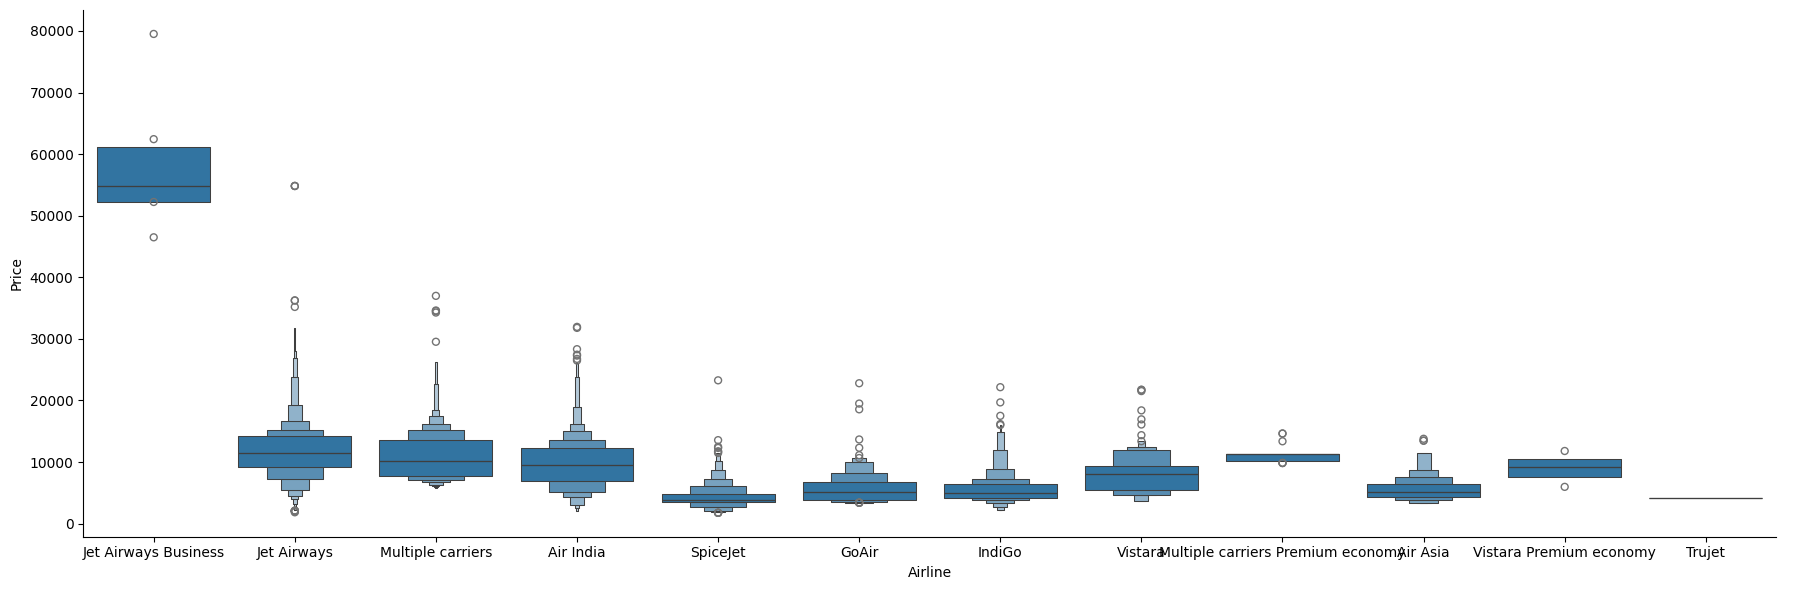

In [14]:
sns.catplot(x='Airline',y='Price',data=flight_train.sort_values('Price',ascending=False),kind='boxen',aspect=3,height=6)

From the plot below we can infer that `Jet Airways Business` is the costliest airways.

## Encoding Categorical Variables

### Creating Dummy Columns out of the `Airline` Column

In [13]:
airline = flight_train[['Airline']]     
airline = pd.get_dummies(airline,drop_first=True,dtype='int')

As Airline is a categorical column, so we will make dummy columns out of it and store the same in the `airline` dataframe

In [14]:
airline.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column                                     Non-Null Count  Dtype
---  ------                                     --------------  -----
 0   Airline_Air India                          10683 non-null  int64
 1   Airline_GoAir                              10683 non-null  int64
 2   Airline_IndiGo                             10683 non-null  int64
 3   Airline_Jet Airways                        10683 non-null  int64
 4   Airline_Jet Airways Business               10683 non-null  int64
 5   Airline_Multiple carriers                  10683 non-null  int64
 6   Airline_Multiple carriers Premium economy  10683 non-null  int64
 7   Airline_SpiceJet                           10683 non-null  int64
 8   Airline_Trujet                             10683 non-null  int64
 9   Airline_Vistara                            10683 non-null  int64
 10  Airline_Vistara Premium economy            106

Here we can see that the categorical column `Airline` is now converted into 'int' datatype

In [15]:
airline.head()

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


## Plotting Source vs Price

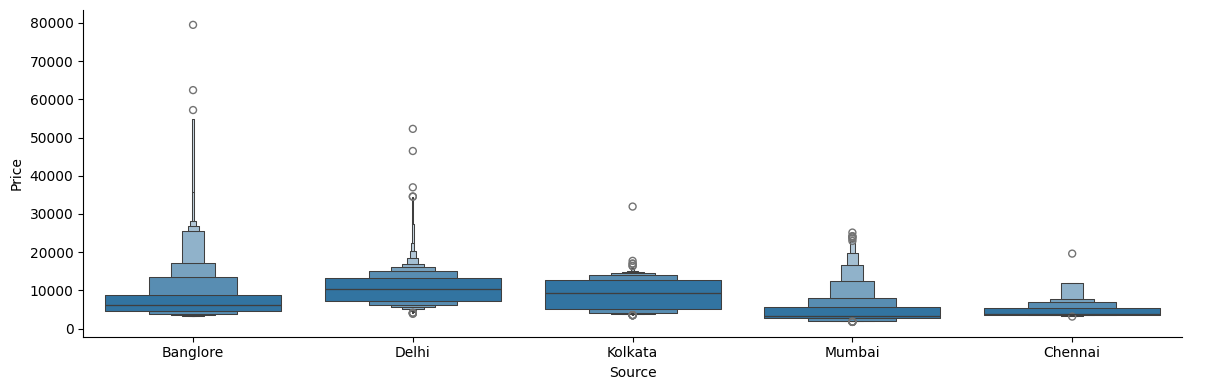

In [18]:
sns.catplot(x='Source',y='Price',data=flight_train.sort_values('Price',ascending=False),kind='boxen',aspect=3,height=4)

The plot above says that if you are going from Bangalore, no matter where you have to pay the highest amount of money.

## Encoding Categorical Variables

### Creating Dummy Columns out of the `Source` Column

In [16]:
source = flight_train[['Source']]
source = pd.get_dummies(source,drop_first=True,dtype='int')

Storing the `int` datatype columns into the `source` dataframe

In [17]:
source.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Source_Chennai  10683 non-null  int64
 1   Source_Delhi    10683 non-null  int64
 2   Source_Kolkata  10683 non-null  int64
 3   Source_Mumbai   10683 non-null  int64
dtypes: int64(4)
memory usage: 334.0 KB


Here we can see that the categorical column of `Source` is now converted into 'int' datatype

In [18]:
source.head()

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


## Plotting Destination vs Price

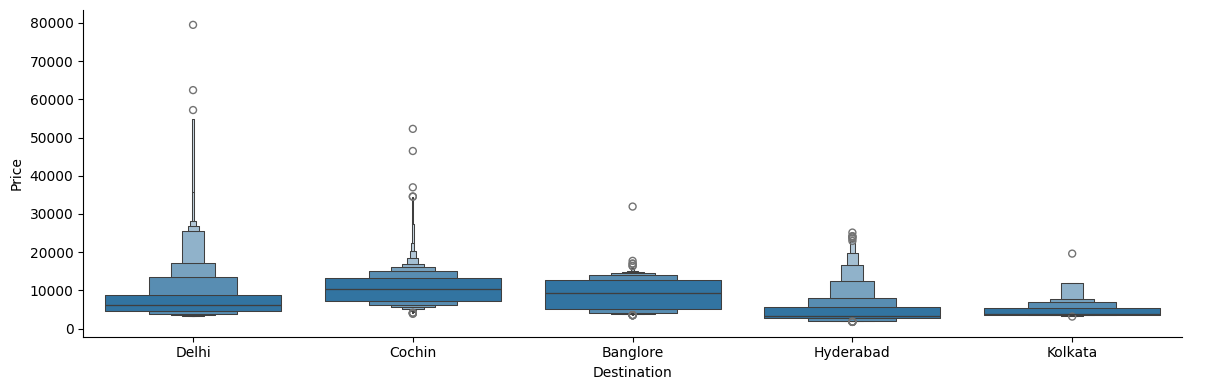

In [22]:
sns.catplot(x='Destination',y='Price',data=flight_train.sort_values('Price',ascending=False),kind='boxen',aspect=3,height=4)

The plot above says that if you are going to New Delhi, no matter from where, you have to pay the highest amount of money.

## Encoding Categorical Variables

### Creating Dummy Columns out of the `Destination` Column

In [19]:
destination = flight_train[['Destination']]
destination = pd.get_dummies(destination,drop_first=True,dtype='int')

Storing the dummy columns in a `destination` dataframe

In [20]:
destination.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   Destination_Cochin     10683 non-null  int64
 1   Destination_Delhi      10683 non-null  int64
 2   Destination_Hyderabad  10683 non-null  int64
 3   Destination_Kolkata    10683 non-null  int64
dtypes: int64(4)
memory usage: 334.0 KB


We can see above that the categorical columns of `Destination` are now converted into 'int' datatype columns

In [21]:
destination.head()

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata
0,0,1,0,0
1,0,0,0,0
2,1,0,0,0
3,0,0,0,0
4,0,1,0,0


## Dropping unwanted columns

In [22]:
flight_train.drop(['Route','Additional_Info'],inplace=True,axis=1)
flight_train.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_Day,Journey_Month,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min,Duration_Hours,Duration_Mins
0,IndiGo,Banglore,Delhi,non-stop,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2 stops,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2 stops,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1 stop,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,Delhi,1 stop,13302,1,3,16,50,21,35,4,45


## Checking values in `Total_Stops` column

In [23]:
flight_train['Total_Stops'].value_counts()

Total_Stops
1 stop      5625
non-stop    3492
2 stops     1520
3 stops       45
4 stops        1
Name: count, dtype: int64

Converting labels into numbers in the `Total_Stops` column.

In [24]:
flight_train['Total_Stops'].replace({'non-stop': 0,'1 stop': 1,'2 stops': 2,'3 stops': 3,'4 stops':4},inplace=True)
flight_train.head()

C:\Users\peer1\AppData\Local\Temp\ipykernel_26868\2101737061.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  flight_train['Total_Stops'].replace({'non-stop': 0,'1 stop': 1,'2 stops': 2,'3 stops': 3,'4 stops':4},inplace=True)
C:\Users\peer1\AppData\Local\Temp\ipykernel_26868\2101737061.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option

,Airline,Source,Destination,Total_Stops,Price,Journey_Day,Journey_Month,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min,Duration_Hours,Duration_Mins
0,IndiGo,Banglore,Delhi,0,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,Delhi,1,13302,1,3,16,50,21,35,4,45


## Checking the shapes of our four dataframes now

In [25]:
print('Shape of airline Dataframe is: ',airline.shape)
print('Shape of source Dataframe is: ',source.shape)
print('Shape of destination Dataframe is: ',destination.shape)
print('Shape of Flight Train Dataset is: ',flight_train.shape)

Shape of airline Dataframe is:  (10683, 11)
Shape of source Dataframe is:  (10683, 4)
Shape of destination Dataframe is:  (10683, 4)
Shape of Flight Train Dataset is:  (10683, 13)


All these 4 data frames have the same number of rows, which means we can join them.

## Combining all the dataframes

Dropping the `Airline`, `Source`, `Destination` columns as we have already created dummy columns for them.

In [26]:
flight_train_new = pd.concat([flight_train,airline,source,destination],axis=1)
flight_train_new.drop(['Airline','Source','Destination'],axis=1,inplace=True)
flight_train_new.head()

,Total_Stops,Price,Journey_Day,Journey_Month,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min,Duration_Hours,Duration_Mins,...,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata
0,0,3897,24,3,22,20,1,10,2,50,...,0,0,0,0,0,0,0,1,0,0
1,2,7662,1,5,5,50,13,15,7,25,...,0,0,0,0,1,0,0,0,0,0
2,2,13882,9,6,9,25,4,25,19,0,...,0,0,0,1,0,0,1,0,0,0
3,1,6218,12,5,18,5,23,30,5,25,...,0,0,0,0,1,0,0,0,0,0
4,1,13302,1,3,16,50,21,35,4,45,...,0,0,0,0,0,0,0,1,0,0


In [27]:
flight_train_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 29 columns):
 #   Column                                     Non-Null Count  Dtype
---  ------                                     --------------  -----
 0   Total_Stops                                10683 non-null  int64
 1   Price                                      10683 non-null  int64
 2   Journey_Day                                10683 non-null  int32
 3   Journey_Month                              10683 non-null  int32
 4   Dep_Hour                                   10683 non-null  int32
 5   Dep_Min                                    10683 non-null  int32
 6   Arrival_Hour                               10683 non-null  int32
 7   Arrival_Min                                10683 non-null  int32
 8   Duration_Hours                             10683 non-null  int64
 9   Duration_Mins                              10683 non-null  int64
 10  Airline_Air India                          106

# Training the Data

In [28]:
X = flight_train_new.drop('Price',axis=1)
X.head()
X.to_csv('Clean_data.csv')


In [29]:
X.isnull().sum()

Total_Stops                                  0
Journey_Day                                  0
Journey_Month                                0
Dep_Hour                                     0
Dep_Min                                      0
Arrival_Hour                                 0
Arrival_Min                                  0
Duration_Hours                               0
Duration_Mins                                0
Airline_Air India                            0
Airline_GoAir                                0
Airline_IndiGo                               0
Airline_Jet Airways                          0
Airline_Jet Airways Business                 0
Airline_Multiple carriers                    0
Airline_Multiple carriers Premium economy    0
Airline_SpiceJet                             0
Airline_Trujet                               0
Airline_Vistara                              0
Airline_Vistara Premium economy              0
Source_Chennai                               0
Source_Delhi 

Taking out train data labels

In [30]:
y = flight_train_new['Price']
y.head()

0     3897
1     7662
2    13882
3     6218
4    13302
Name: Price, dtype: int64

## Checking Correlations between the columns again after Data Preparation

This is the correlation after creating dummy variable of column `Airline`, `Source`, `Destination` which will lead in better accuracy score of the model.

<Axes: >

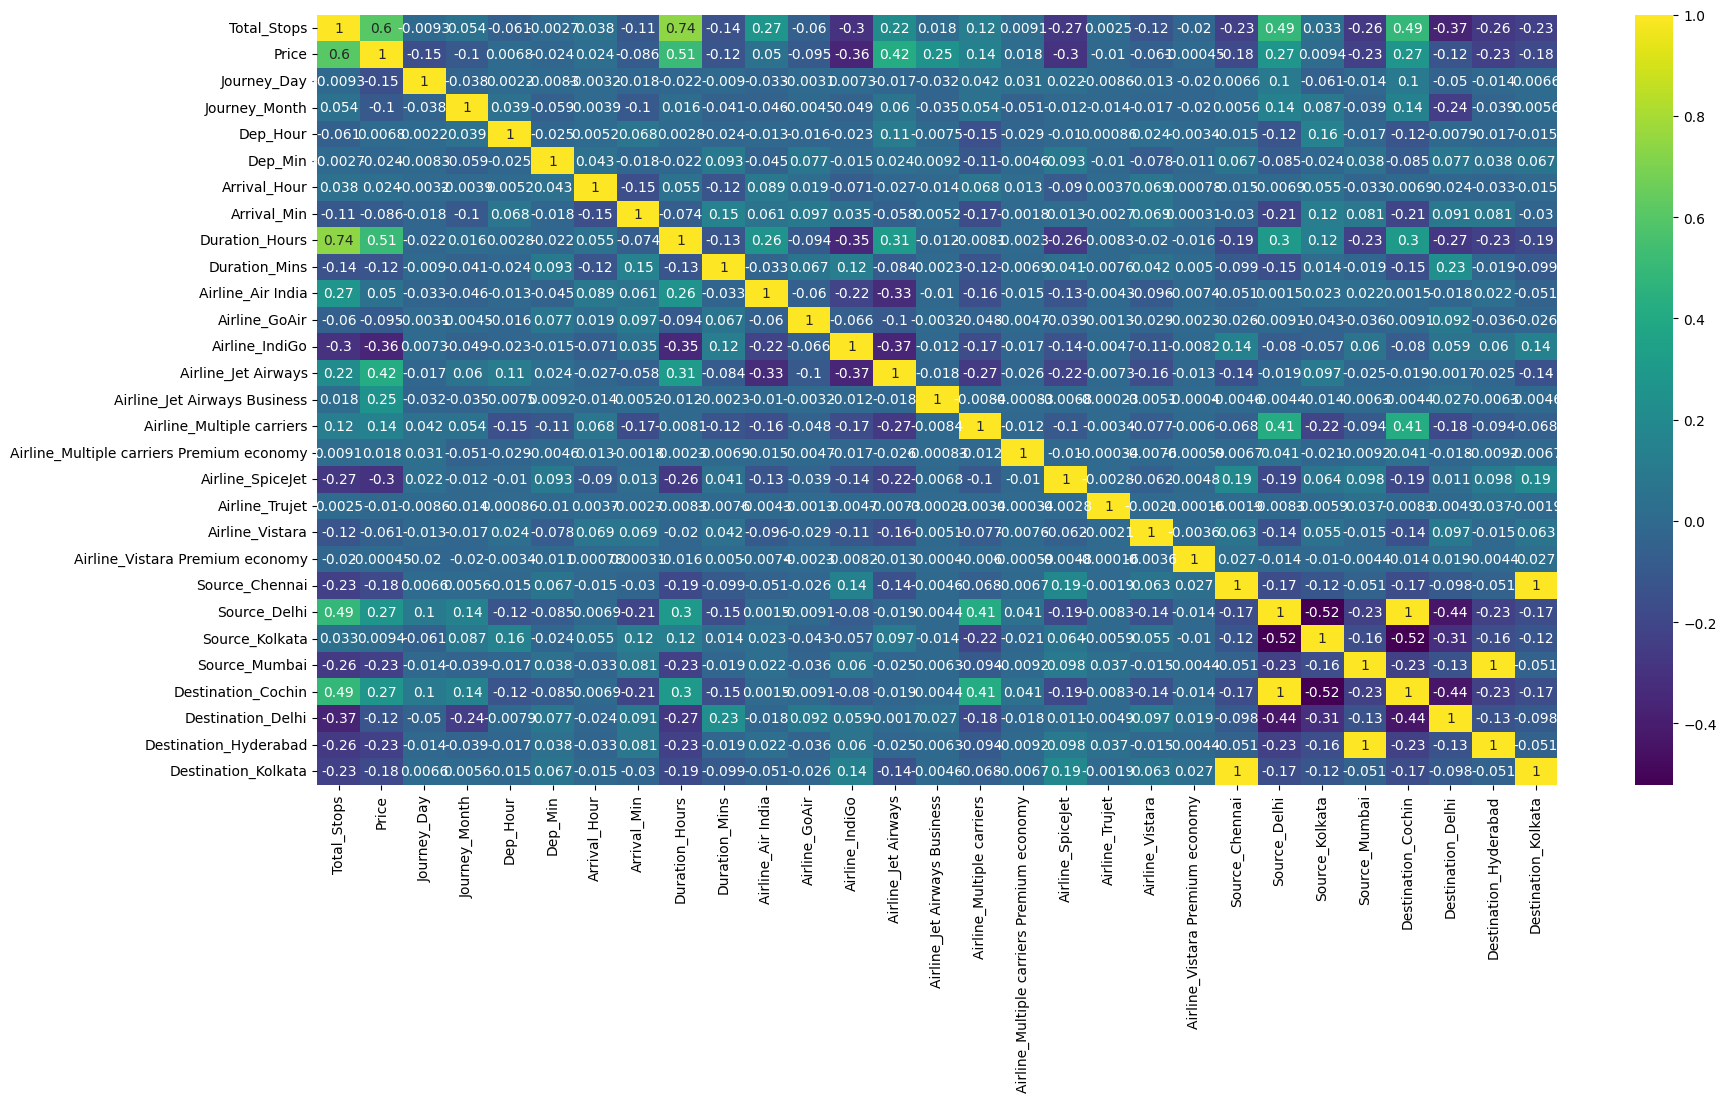

In [35]:
plt.figure(figsize=(20,10))
sns.heatmap(flight_train_new.corr(),cmap='viridis',annot=True)

# Train Test Split

We split the training and testing data set in the ratio of 7:3

70% of the data will be used for training the model 
30% of the data will be used for testing the accuracy of our built model

`random_state`=42  ensures that the splits that we generate are reproducible.
(i.e if in future we run our model again on the same dataset then we will be getting the same accuracy)

# Model Training

We will be training our dataset on 5 models:

- Linear Regression Model
- K Neighbours Regressor
- Decision Tree Regressor
- Gradient Boosting Regressor
- XGB Regressor
- Random Forest Regressor

# Linear Regression

In [33]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# Define independent variables (X) and target variable (y)
X = flight_train_new.drop('Price', axis=1)
y = flight_train_new['Price']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Predict on the test set
lr_y_pred = lr_model.predict(X_test)

# Evaluate the model
lr_mae = mean_absolute_error(y_test, lr_y_pred)
lr_mse = mean_squared_error(y_test, lr_y_pred)
lr_r2 = r2_score(y_test, lr_y_pred)
train_score = lr_model.score(X_train, y_train)
test_score = lr_model.score(X_test, y_test)

print(f"Linear Regression - MAE: {lr_mae}, MSE: {lr_mse}, R²: {lr_r2}")
print(f"Train Score: {train_score}")
print(f"Test Score: {test_score}")


Linear Regression - MAE: 2012.4009135738058, MSE: 8554208.946312474, R²: 0.5958125748355818
Train Score: 0.614593493814501
Test Score: 0.5958125748355818


#  K Neighbours Regressor

In [34]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# Define independent variables (X) and target variable (y)
X = flight_train_new.drop('Price', axis=1)
y = flight_train_new['Price']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the K-Neighbors Regressor model
knn_model = KNeighborsRegressor(n_neighbors=5)  # You can adjust n_neighbors as needed
knn_model.fit(X_train, y_train)

# Predict on the test set
knn_y_pred = knn_model.predict(X_test)

# Evaluate the model
knn_mae = mean_absolute_error(y_test, knn_y_pred)
knn_mse = mean_squared_error(y_test, knn_y_pred)
knn_r2 = r2_score(y_test, knn_y_pred)
train_score = knn_model.score(X_train, y_train)
test_score = knn_model.score(X_test, y_test)

print(f"K-Neighbors Regressor - MAE: {knn_mae}, MSE: {knn_mse}, R²: {knn_r2}")
print(f"Train Score: {train_score}")
print(f"Test Score: {test_score}")


K-Neighbors Regressor - MAE: 1939.3238184370614, MSE: 9798413.855479645, R²: 0.537023739799001
Train Score: 0.7404855020254455
Test Score: 0.537023739799001


# Decision Tree Regressor

In [35]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# Define independent variables (X) and target variable (y)
X = flight_train_new.drop('Price', axis=1)
y = flight_train_new['Price']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the model
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)

# Predict on the test set
dt_y_pred = dt_model.predict(X_test)

# Evaluate the model
dt_mae = mean_absolute_error(y_test, dt_y_pred)
dt_mse = mean_squared_error(y_test, dt_y_pred)
dt_r2 = r2_score(y_test, dt_y_pred)
train_score = dt_model.score(X_train, y_train)
test_score = dt_model.score(X_test, y_test)

print(f"Decision Tree Regressor - MAE: {dt_mae}, MSE: {dt_mse}, R²: {dt_r2}")
print(f"Train Score: {train_score}")
print(f"Test Score: {test_score}")


Decision Tree Regressor - MAE: 1387.9081734518795, MSE: 6670868.358859512, R²: 0.684800649306033
Train Score: 0.9697622209007399
Test Score: 0.684800649306033


#  Gradient Boosting Regressor

In [36]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# Define independent variables (X) and target variable (y)
X = flight_train_new.drop('Price', axis=1)
y = flight_train_new['Price']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Gradient Boosting Regressor model
gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42)
gb_model.fit(X_train, y_train)

# Predict on the test set
gb_y_pred = gb_model.predict(X_test)

# Evaluate the model
gb_mae = mean_absolute_error(y_test, gb_y_pred)
gb_mse = mean_squared_error(y_test, gb_y_pred)
gb_r2 = r2_score(y_test, gb_y_pred)
train_score = gb_model.score(X_train, y_train)
test_score = gb_model.score(X_test, y_test)

print(f"Gradient Boosting Regressor - MAE: {gb_mae}, MSE: {gb_mse}, R²: {gb_r2}")
print(f"Train Score: {train_score}")
print(f"Test Score: {test_score}")


Gradient Boosting Regressor - MAE: 1566.8016319132053, MSE: 4964982.656965755, R²: 0.7654039586009809
Train Score: 0.7836887471770861
Test Score: 0.7654039586009809


# XGB Regressor

In [37]:
import xgboost as xgb
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# Define independent variables (X) and target variable (y)
X = flight_train_new.drop('Price', axis=1)
y = flight_train_new['Price']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the XGB Regressor model
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, max_depth=3, random_state=42)
xgb_model.fit(X_train, y_train)

# Predict on the test set
xgb_y_pred = xgb_model.predict(X_test)

# Evaluate the model
xgb_mae = mean_absolute_error(y_test, xgb_y_pred)
xgb_mse = mean_squared_error(y_test, xgb_y_pred)
xgb_r2 = r2_score(y_test, xgb_y_pred)
train_score = xgb_model.score(X_train, y_train)
test_score = xgb_model.score(X_test, y_test)

print(f"XGB Regressor - MAE: {xgb_mae}, MSE: {xgb_mse}, R²: {xgb_r2}")
print(f"Train Score: {train_score}")
print(f"Test Score: {test_score}")


XGB Regressor - MAE: 1409.849609375, MSE: 4152473.75, R²: 0.8037950992584229
Train Score: 0.8307597041130066
Test Score: 0.8037950992584229


# Random Forest Regressor

In [38]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# Define independent variables (X) and target variable (y)
X = flight_train_new.drop('Price', axis=1)
y = flight_train_new['Price']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict on the test set
rf_y_pred = rf_model.predict(X_test)

# Evaluate the model
rf_mae = mean_absolute_error(y_test, rf_y_pred)
rf_mse = mean_squared_error(y_test, rf_y_pred)
rf_r2 = r2_score(y_test, rf_y_pred)
train_score = rf_model.score(X_train, y_train)
test_score = rf_model.score(X_test, y_test)

print(f"Random Forest Regressor - MAE: {rf_mae}, MSE: {rf_mse}, R²: {rf_r2}")
print(f"Train Score: {train_score}")
print(f"Test Score: {test_score}")


Random Forest Regressor - MAE: 1195.856402574535, MSE: 4562540.18003957, R²: 0.7844194151495032
Train Score: 0.9541913209294139
Test Score: 0.7844194151495032


# ML flow

# Linear Regression

In [66]:
import mlflow
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# Set the tracking URI
mlflow.set_tracking_uri("http://127.0.0.1:5000/")

# Set the experiment name
experiment_name = "Flight_price_prediction"
mlflow.set_experiment(experiment_name)

# Enable autologging
mlflow.autolog()

# Define independent variables (X) and target variable (y)
X = flight_train_new.drop('Price', axis=1)
y = flight_train_new['Price']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Set a meaningful name for the run 
run_name = "Linear Regression Run"

with mlflow.start_run(run_name=run_name):
    # Initialize and train the model
    lr_model = LinearRegression()
    lr_model.fit(X_train, y_train)

    # Predict on the test set
    lr_y_pred = lr_model.predict(X_test)

    # Evaluate the model
    lr_mae = mean_absolute_error(y_test, lr_y_pred)
    lr_mse = mean_squared_error(y_test, lr_y_pred)
    lr_r2 = r2_score(y_test, lr_y_pred)

    print(f"Linear Regression - MAE: {lr_mae}, MSE: {lr_mse}, R²: {lr_r2}")
    
    # Manually log parameters and metrics to MLflow (autolog will also handle this)
    mlflow.log_param("model", "Linear Regression")
    mlflow.log_metric("MAE", lr_mae)
    mlflow.log_metric("MSE", lr_mse)
    mlflow.log_metric("R2", lr_r2)

    # Log the model
    mlflow.sklearn.log_model(lr_model, "model")


2025/01/05 12:24:21 INFO mlflow.tracking.fluent: Experiment with name 'Flight_price_prediction' does not exist. Creating a new experiment.
2025/01/05 12:24:21 WARNING mlflow.utils.autologging_utils: MLflow sklearn autologging is known to be compatible with 0.24.1 <= scikit-learn <= 1.5.2, but the installed version is 1.6.0. If you encounter errors during autologging, try upgrading / downgrading scikit-learn to a compatible version, or try upgrading MLflow.
2025/01/05 12:24:21 INFO mlflow.tracking.fluent: Autologging successfully enabled for sklearn.
2025/01/05 12:24:21 INFO mlflow.tracking.fluent: Autologging successfully enabled for xgboost.
2025/01/05 12:24:21 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "c:\Users\peer1\AppData\Local\Programs\Python\Python312\Lib\site-packages\mlflow\types\utils.py:435: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data conta

Linear Regression - MAE: 2012.4009135738058, MSE: 8554208.946312474, R²: 0.5958125748355818


2025/01/05 12:24:28 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run Linear Regression Run at: http://127.0.0.1:5000/#/experiments/839371715419485862/runs/2e9c0d01f1474e11b64295fb74a60256
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/839371715419485862


# K Neighbours Regressor

In [67]:
import mlflow
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# Set the experiment name
experiment_name = "Flight_price_prediction"
mlflow.set_experiment(experiment_name)

# Define independent variables (X) and target variable (y)
X = flight_train_new.drop('Price', axis=1)
y = flight_train_new['Price']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Set a meaningful name for the run
run_name = "K-Neighbors Regressor Run"

with mlflow.start_run(run_name=run_name):
    # Initialize and train the K-Neighbors Regressor model
    knn_model = KNeighborsRegressor(n_neighbors=5)  # You can adjust n_neighbors as needed
    knn_model.fit(X_train, y_train)

    # Predict on the test set
    knn_y_pred = knn_model.predict(X_test)

    # Evaluate the model
    knn_mae = mean_absolute_error(y_test, knn_y_pred)
    knn_mse = mean_squared_error(y_test, knn_y_pred)
    knn_r2 = r2_score(y_test, knn_y_pred)

    print(f"K-Neighbors Regressor - MAE: {knn_mae}, MSE: {knn_mse}, R²: {knn_r2}")
    
    # Log parameters and metrics to MLflow
    mlflow.log_param("model", "K-Neighbors Regressor")
    mlflow.log_param("n_neighbors", 5)  # Log the parameter n_neighbors
    mlflow.log_metric("MAE", knn_mae)
    mlflow.log_metric("MSE", knn_mse)
    mlflow.log_metric("R2", knn_r2)

    # Log the model
    mlflow.sklearn.log_model(knn_model, "model")


2025/01/05 12:24:32 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "c:\Users\peer1\AppData\Local\Programs\Python\Python312\Lib\site-packages\mlflow\types\utils.py:435: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details."
2025/01/05 12:24:34 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "c:\Users\peer1\AppData\Lo

K-Neighbors Regressor - MAE: 1939.3238184370614, MSE: 9798413.855479645, R²: 0.537023739799001


2025/01/05 12:24:42 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run K-Neighbors Regressor Run at: http://127.0.0.1:5000/#/experiments/839371715419485862/runs/10e110600b414c2c82a81e5827df51d5
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/839371715419485862


# Decision Tree Regressor

In [68]:
import mlflow
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# Set the tracking URI
mlflow.set_tracking_uri("http://127.0.0.1:5000/")

# Set the experiment name
experiment_name = "Flight_price_prediction"
mlflow.set_experiment(experiment_name)

# Enable autologging
mlflow.autolog()

# Define independent variables (X) and target variable (y)
X = flight_train_new.drop('Price', axis=1)
y = flight_train_new['Price']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Set a meaningful name for the run
run_name = "Decision Tree Regressor Run"

with mlflow.start_run(run_name=run_name):
    # Initialize and train the Decision Tree Regressor model
    dt_model = DecisionTreeRegressor(random_state=42)
    dt_model.fit(X_train, y_train)

    # Predict on the test set
    dt_y_pred = dt_model.predict(X_test)

    # Evaluate the model
    dt_mae = mean_absolute_error(y_test, dt_y_pred)
    dt_mse = mean_squared_error(y_test, dt_y_pred)
    dt_r2 = r2_score(y_test, dt_y_pred)

    print(f"Decision Tree Regressor - MAE: {dt_mae}, MSE: {dt_mse}, R²: {dt_r2}")
    
    # Manually log parameters and metrics to MLflow (autolog will also handle this)
    mlflow.log_param("model", "Decision Tree Regressor")
    mlflow.log_param("run_name", run_name)
    mlflow.log_metric("MAE", dt_mae)
    mlflow.log_metric("MSE", dt_mse)
    mlflow.log_metric("R2", dt_r2)

    # Log the model
    mlflow.sklearn.log_model(dt_model, "model")


2025/01/05 12:24:44 WARNING mlflow.utils.autologging_utils: MLflow sklearn autologging is known to be compatible with 0.24.1 <= scikit-learn <= 1.5.2, but the installed version is 1.6.0. If you encounter errors during autologging, try upgrading / downgrading scikit-learn to a compatible version, or try upgrading MLflow.
2025/01/05 12:24:44 INFO mlflow.tracking.fluent: Autologging successfully enabled for sklearn.
2025/01/05 12:24:44 INFO mlflow.tracking.fluent: Autologging successfully enabled for xgboost.
2025/01/05 12:24:44 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "c:\Users\peer1\AppData\Local\Programs\Python\Python312\Lib\site-packages\mlflow\types\utils.py:435: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this pr

Decision Tree Regressor - MAE: 1387.9081734518795, MSE: 6670868.358859512, R²: 0.684800649306033


2025/01/05 12:24:51 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run Decision Tree Regressor Run at: http://127.0.0.1:5000/#/experiments/839371715419485862/runs/58041fd4386b4c1a9e4a1c7f752e02a3
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/839371715419485862


#  Gradient Boosting Regressor

In [69]:
import mlflow
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# Set the tracking URI
mlflow.set_tracking_uri("http://127.0.0.1:5000/")

# Set the experiment name
experiment_name = "Flight_price_prediction"
mlflow.set_experiment(experiment_name)

# Enable autologging
mlflow.autolog()

# Define independent variables (X) and target variable (y)
X = flight_train_new.drop('Price', axis=1)
y = flight_train_new['Price']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Set a meaningful name for the run
run_name = "Gradient Boosting Regressor"

with mlflow.start_run(run_name=run_name):
    # Initialize and train the Gradient Boosting Regressor model
    gb_model = GradientBoostingRegressor(n_estimators=100, max_depth=3, random_state=42)
    gb_model.fit(X_train, y_train)

    # Predict on the test set
    gb_y_pred = gb_model.predict(X_test)

    # Evaluate the model
    gb_mae = mean_absolute_error(y_test, gb_y_pred)
    gb_mse = mean_squared_error(y_test, gb_y_pred)
    gb_r2 = r2_score(y_test, gb_y_pred)

    print(f"Gradient Boosting Regressor - MAE: {gb_mae}, MSE: {gb_mse}, R²: {gb_r2}")

    # Manually log parameters and metrics to MLflow (autolog will also handle this)
    mlflow.log_param("model", "Gradient Boosting Regressor")
    mlflow.log_param("n_estimators", 100)
    mlflow.log_param("max_depth", 3)
    mlflow.log_metric("MAE", gb_mae)
    mlflow.log_metric("MSE", gb_mse)
    mlflow.log_metric("R2", gb_r2)

    # Log the model
    mlflow.sklearn.log_model(gb_model, "model")


2025/01/05 12:24:53 WARNING mlflow.utils.autologging_utils: MLflow sklearn autologging is known to be compatible with 0.24.1 <= scikit-learn <= 1.5.2, but the installed version is 1.6.0. If you encounter errors during autologging, try upgrading / downgrading scikit-learn to a compatible version, or try upgrading MLflow.


2025/01/05 12:24:53 INFO mlflow.tracking.fluent: Autologging successfully enabled for sklearn.
2025/01/05 12:24:53 INFO mlflow.tracking.fluent: Autologging successfully enabled for xgboost.
2025/01/05 12:24:53 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "c:\Users\peer1\AppData\Local\Programs\Python\Python312\Lib\site-packages\mlflow\types\utils.py:435: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.htm

Gradient Boosting Regressor - MAE: 1566.8016319132053, MSE: 4964982.656965755, R²: 0.7654039586009809


2025/01/05 12:25:01 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run Gradient Boosting Regressor at: http://127.0.0.1:5000/#/experiments/839371715419485862/runs/867ebc99d74b48aa9c0760bc1e804141
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/839371715419485862


# XGB Regressor

In [70]:
import mlflow
import xgboost as xgb
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# Set the tracking URI
mlflow.set_tracking_uri("http://127.0.0.1:5000/")

# Set the experiment name
experiment_name = "Flight_price_prediction"
mlflow.set_experiment(experiment_name)

# Enable autologging
mlflow.autolog()

# Define independent variables (X) and target variable (y)
X = flight_train_new.drop('Price', axis=1)
y = flight_train_new['Price']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Set a meaningful name for the run
run_name = "XGB Regressor Run"

with mlflow.start_run(run_name=run_name):
    # Initialize and train the XGB Regressor model
    xgb_model = xgb.XGBRegressor(n_estimators=100, max_depth=3, random_state=42, objective='reg:squarederror')
    xgb_model.fit(X_train, y_train)

    # Predict on the test set
    xgb_y_pred = xgb_model.predict(X_test)

    # Evaluate the model
    xgb_mae = mean_absolute_error(y_test, xgb_y_pred)
    xgb_mse = mean_squared_error(y_test, xgb_y_pred)
    xgb_r2 = r2_score(y_test, xgb_y_pred)

    print(f"XGB Regressor - MAE: {xgb_mae}, MSE: {xgb_mse}, R²: {xgb_r2}")

    # Manually log parameters and metrics to MLflow (autolog will also handle this)
    mlflow.log_param("model", "XGB Regressor")
    mlflow.log_param("n_estimators", 100)
    mlflow.log_param("max_depth", 3)
    mlflow.log_metric("MAE", xgb_mae)
    mlflow.log_metric("MSE", xgb_mse)
    mlflow.log_metric("R2", xgb_r2)

    # Log the model
    mlflow.sklearn.log_model(xgb_model, "model")


2025/01/05 12:25:04 WARNING mlflow.utils.autologging_utils: MLflow sklearn autologging is known to be compatible with 0.24.1 <= scikit-learn <= 1.5.2, but the installed version is 1.6.0. If you encounter errors during autologging, try upgrading / downgrading scikit-learn to a compatible version, or try upgrading MLflow.
2025/01/05 12:25:05 INFO mlflow.tracking.fluent: Autologging successfully enabled for sklearn.
2025/01/05 12:25:05 INFO mlflow.tracking.fluent: Autologging successfully enabled for xgboost.
2025/01/05 12:25:05 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "c:\Users\peer1\AppData\Local\Programs\Python\Python312\Lib\site-packages\mlflow\types\utils.py:435: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this pr

XGB Regressor - MAE: 1409.849609375, MSE: 4152473.75, R²: 0.8037950992584229


2025/01/05 12:25:12 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run XGB Regressor Run at: http://127.0.0.1:5000/#/experiments/839371715419485862/runs/91755ac4ed194485b0696a0b0ce1a35a
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/839371715419485862


# Random Forest Regressor

In [71]:
import mlflow
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# Set the tracking URI
mlflow.set_tracking_uri("http://127.0.0.1:5000/")

# Set the experiment name
experiment_name = "Flight_price_prediction"
mlflow.set_experiment(experiment_name)

# Enable autologging
mlflow.autolog()

# Define independent variables (X) and target variable (y)
X = flight_train_new.drop('Price', axis=1)
y = flight_train_new['Price']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Set a meaningful name for the run
run_name = "Random Forest Regressor Run"

with mlflow.start_run(run_name=run_name):
    # Initialize and train the Random Forest Regressor model
    rf_model = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)
    rf_model.fit(X_train, y_train)

    # Predict on the test set
    rf_y_pred = rf_model.predict(X_test)

    # Evaluate the model
    rf_mae = mean_absolute_error(y_test, rf_y_pred)
    rf_mse = mean_squared_error(y_test, rf_y_pred)
    rf_r2 = r2_score(y_test, rf_y_pred)

    print(f"Random Forest Regressor - MAE: {rf_mae}, MSE: {rf_mse}, R²: {rf_r2}")

    # Manually log parameters and metrics to MLflow (autolog will also handle this)
    mlflow.log_param("model", "Random Forest Regressor")
    mlflow.log_param("n_estimators", 100)
    mlflow.log_param("max_depth", 10)
    mlflow.log_metric("MAE", rf_mae)
    mlflow.log_metric("MSE", rf_mse)
    mlflow.log_metric("R2", rf_r2)

    # Log the model
    mlflow.sklearn.log_model(rf_model, "model")


2025/01/05 12:25:14 WARNING mlflow.utils.autologging_utils: MLflow sklearn autologging is known to be compatible with 0.24.1 <= scikit-learn <= 1.5.2, but the installed version is 1.6.0. If you encounter errors during autologging, try upgrading / downgrading scikit-learn to a compatible version, or try upgrading MLflow.
2025/01/05 12:25:15 INFO mlflow.tracking.fluent: Autologging successfully enabled for sklearn.
2025/01/05 12:25:15 INFO mlflow.tracking.fluent: Autologging successfully enabled for xgboost.
2025/01/05 12:25:15 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "c:\Users\peer1\AppData\Local\Programs\Python\Python312\Lib\site-packages\mlflow\types\utils.py:435: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this pr

Random Forest Regressor - MAE: 1289.7249624326705, MSE: 4439403.083833839, R²: 0.7902376580951671


2025/01/05 12:25:24 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run Random Forest Regressor Run at: http://127.0.0.1:5000/#/experiments/839371715419485862/runs/a6603249d2804d0f9f2f37226fa2aaf1
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/839371715419485862


# Hyper parameter Tuning for Random Forest Regressor

In [72]:
import mlflow
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, RandomizedSearchCV
import numpy as np

# Set the tracking URI
mlflow.set_tracking_uri("http://127.0.0.1:5000/")

# Set the experiment name
experiment_name = "Flight_price_prediction"
mlflow.set_experiment(experiment_name)

# Enable autologging
mlflow.autolog()

# Define independent variables (X) and target variable (y)
X = flight_train_new.drop('Price', axis=1)
y = flight_train_new['Price']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the parameter grid for RandomizedSearchCV
params_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Initialize the RandomizedSearchCV with RandomForestRegressor
model_rf = RandomizedSearchCV(
    RandomForestRegressor(random_state=42),
    param_distributions=params_rf,
    random_state=42,
    n_iter=10,
    cv=5,
    n_jobs=-1
)

# Set a meaningful name for the run
run_name = "Random Forest Regressor Hyperparameter Tuning Run"

with mlflow.start_run(run_name=run_name):
    # Fit the RandomizedSearchCV
    model_rf.fit(X_train, y_train)

    # Get the best estimator
    best_rf_model = model_rf.best_estimator_

    # Predict on the test set
    rf_y_pred = best_rf_model.predict(X_test)

    # Evaluate the model
    rf_mae = mean_absolute_error(y_test, rf_y_pred)
    rf_mse = mean_squared_error(y_test, rf_y_pred)
    rf_r2 = r2_score(y_test, rf_y_pred)
    train_score = best_rf_model.score(X_train, y_train)
    test_score = best_rf_model.score(X_test, y_test)

    print(f"Random Forest Regressor - MAE: {rf_mae}, MSE: {rf_mse}, R²: {rf_r2}")

    # Log parameters and metrics to MLflow
    mlflow.log_param("model", "Random Forest Regressor")
    mlflow.log_params(model_rf.best_params_)
    mlflow.log_metric("MAE", rf_mae)
    mlflow.log_metric("MSE", rf_mse)
    mlflow.log_metric("R2", rf_r2)

    # Log the model
    mlflow.sklearn.log_model(best_rf_model, "model")


2025/01/05 12:25:49 WARNING mlflow.utils.autologging_utils: MLflow sklearn autologging is known to be compatible with 0.24.1 <= scikit-learn <= 1.5.2, but the installed version is 1.6.0. If you encounter errors during autologging, try upgrading / downgrading scikit-learn to a compatible version, or try upgrading MLflow.
2025/01/05 12:25:49 INFO mlflow.tracking.fluent: Autologging successfully enabled for sklearn.
2025/01/05 12:25:49 INFO mlflow.tracking.fluent: Autologging successfully enabled for xgboost.
2025/01/05 12:25:49 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "c:\Users\peer1\AppData\Local\Programs\Python\Python312\Lib\site-packages\mlflow\types\utils.py:435: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this pr

Random Forest Regressor - MAE: 1151.5779579107214, MSE: 4179439.871495525, R²: 0.8025209518622418


2025/01/05 12:26:12 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run Random Forest Regressor Hyperparameter Tuning Run at: http://127.0.0.1:5000/#/experiments/839371715419485862/runs/02a857d9c91c4ff1a39ad54cb4218d78
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/839371715419485862


# Model Registration

In [73]:
model_name = "Random Forest Regressor"
run_id = input('Please type RunID')
model_uri = f'runs:/{run_id}/model_name'

with mlflow.start_run(run_id=run_id):
    mlflow.register_model(model_uri=model_uri,name=model_name)

Successfully registered model 'Random Forest Regressor'.
2025/01/05 12:32:32 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: Random Forest Regressor, version 1


🏃 View run Random Forest Regressor Hyperparameter Tuning Run at: http://127.0.0.1:5000/#/experiments/839371715419485862/runs/02a857d9c91c4ff1a39ad54cb4218d78
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/839371715419485862


Created version '1' of model 'Random Forest Regressor'.


In [74]:
model_name = "XGB Regressor"
run_id = input('Please type RunID')
model_uri = f'runs:/{run_id}/model_name'

with mlflow.start_run(run_id=run_id):
    mlflow.register_model(model_uri=model_uri,name=model_name)

Successfully registered model 'XGB Regressor'.
2025/01/05 12:32:48 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: XGB Regressor, version 1


🏃 View run XGB Regressor Run at: http://127.0.0.1:5000/#/experiments/839371715419485862/runs/91755ac4ed194485b0696a0b0ce1a35a
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/839371715419485862


Created version '1' of model 'XGB Regressor'.
